Fashion MNIST Classification using FNN

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


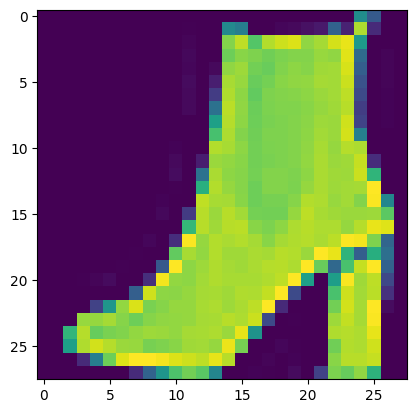

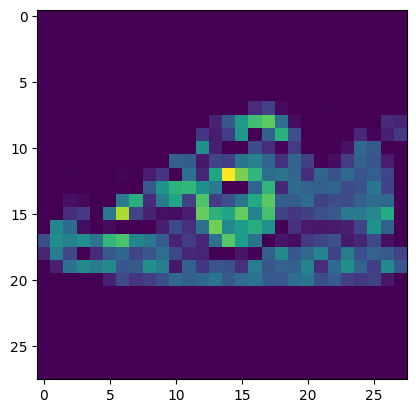

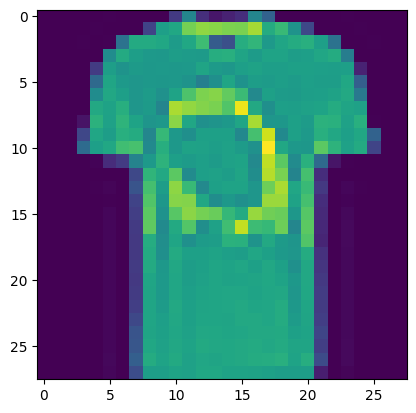

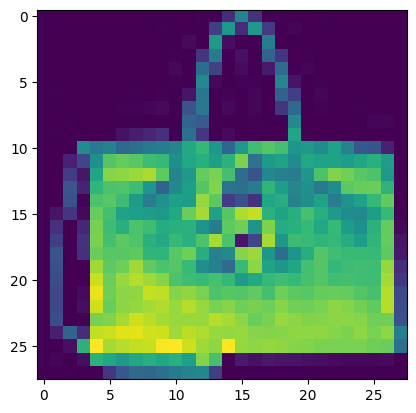

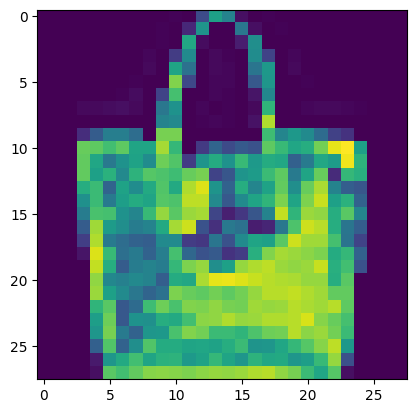

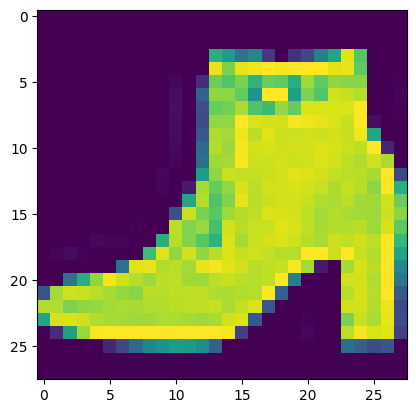

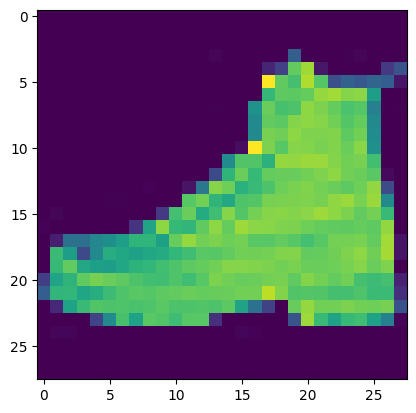

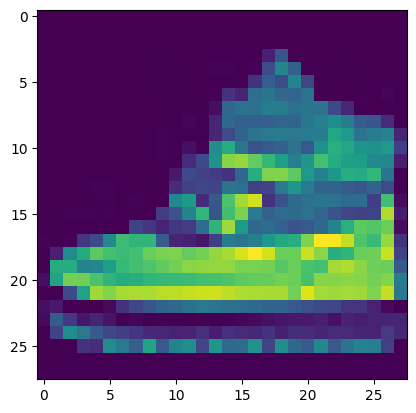

In [34]:
for i in range(8):
    image = df.iloc[i,1:].values.reshape(28,28)
    plt.imshow(image)
    plt.show()


In [35]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X.shape

(6000, 784)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
X_train = X_train/255.0
X_test = X_test/255.0

In [38]:
class customDataset(Dataset):
    def __init__(self,features, target):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.target = torch.tensor(target,dtype = torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index],self.target[index]

In [39]:
train_dataset = customDataset(X_train, y_train)
test_dataset = customDataset(X_test, y_test)
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0471, 0.0745, 0.1216, 0.0588, 0.4353, 0.3529, 0.0431, 0.1333,
         0.0627, 0.0314, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0510, 0.0784, 0.0549, 0.0549, 0.0275, 0.2275, 0.1608, 0.0118,
         0.0510, 0.0745, 0.0588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0588, 0.0627, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0157, 0.0392, 0.0471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0314, 0.1608, 0.4314, 0.2078, 0.0431,
         0.1725, 0.2157, 0.1451, 0.1255, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [40]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle= False)

In [41]:
len(test_loader), len(train_loader)

(38, 150)

In [42]:
#Build the Neural Network
class FNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,X):
        output = self.network(X)
        return output

In [43]:
model = FNN(X_train.shape[1])

In [44]:
epochs = 100
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [45]:
#Training Loop
for epoch in range(epochs):
    total_epoch_loss = 0
    no_of_batches = 0
    for X_batch, y_batch in train_loader:
        output = model(X_batch)
        loss = criterion(output,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_epoch_loss += loss.item()
        no_of_batches += 1
    print(f'Epoch: {epoch+1} Loss {total_epoch_loss/no_of_batches}')

Epoch: 1 Loss 1.3206464346249898
Epoch: 2 Loss 0.8001857213179271
Epoch: 3 Loss 0.6540926317373912
Epoch: 4 Loss 0.6045251578092575
Epoch: 5 Loss 0.552305872241656
Epoch: 6 Loss 0.5044444608688354
Epoch: 7 Loss 0.47295857896407445
Epoch: 8 Loss 0.45174744913975395
Epoch: 9 Loss 0.4247978722055753
Epoch: 10 Loss 0.41058324550588926
Epoch: 11 Loss 0.38993590051929156
Epoch: 12 Loss 0.38043710405627884
Epoch: 13 Loss 0.35558294102549554
Epoch: 14 Loss 0.3452389493584633
Epoch: 15 Loss 0.3490278950333595
Epoch: 16 Loss 0.3211045665542285
Epoch: 17 Loss 0.30652279376983643
Epoch: 18 Loss 0.29420378784338636
Epoch: 19 Loss 0.2816760204732418
Epoch: 20 Loss 0.2713349032898744
Epoch: 21 Loss 0.29370139946540197
Epoch: 22 Loss 0.26239921008547146
Epoch: 23 Loss 0.2493023163576921
Epoch: 24 Loss 0.24606991390387217
Epoch: 25 Loss 0.23919525511562825
Epoch: 26 Loss 0.234963789259394
Epoch: 27 Loss 0.22558053977787496
Epoch: 28 Loss 0.21902625307440757
Epoch: 29 Loss 0.200850995456179
Epoch: 30 Lo

In [46]:
#Evaluation
model.eval()
total = 0
correct_value = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        output = model(X_batch)
        _,pred_label = torch.max(output,1)
        total = total + X_batch.shape[0]
        correct_value = correct_value + (pred_label==y_batch).sum().item()
print(correct_value/total)


0.8375
